Для дальнейших манипуляций нам понадобится этот модуль

In [ ]:
!pip install ruptures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import tsfresh
import json
import datetime
from model import *
from cumsum import *
import ruptures as rpt

In [2]:
data = pd.read_excel('project_3_train+test.xlsx', index_col='Date')

In [3]:
train = data.iloc[:357]
test = data.iloc[357:]

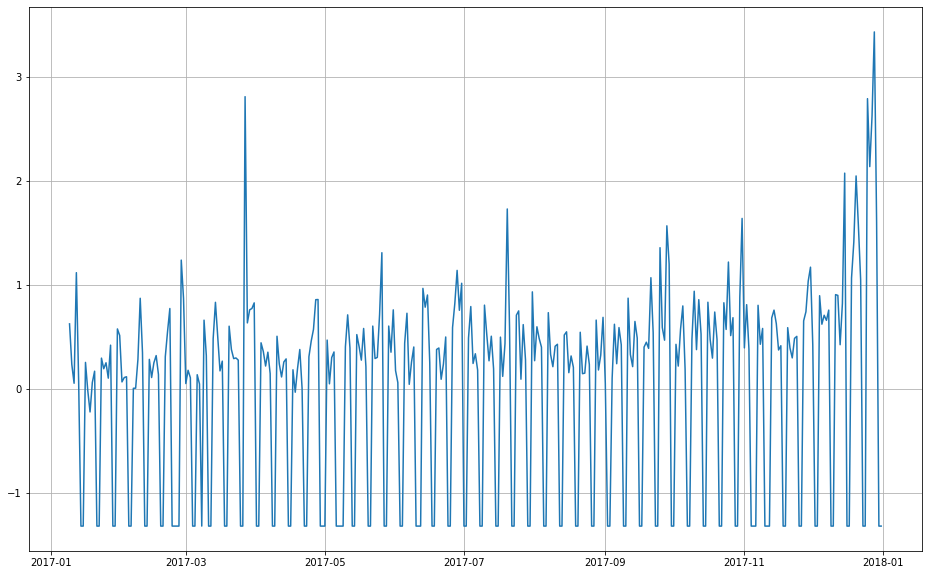

In [4]:
plt.figure(figsize=(16,10))
plt.plot(train)
plt.grid()
plt.show()

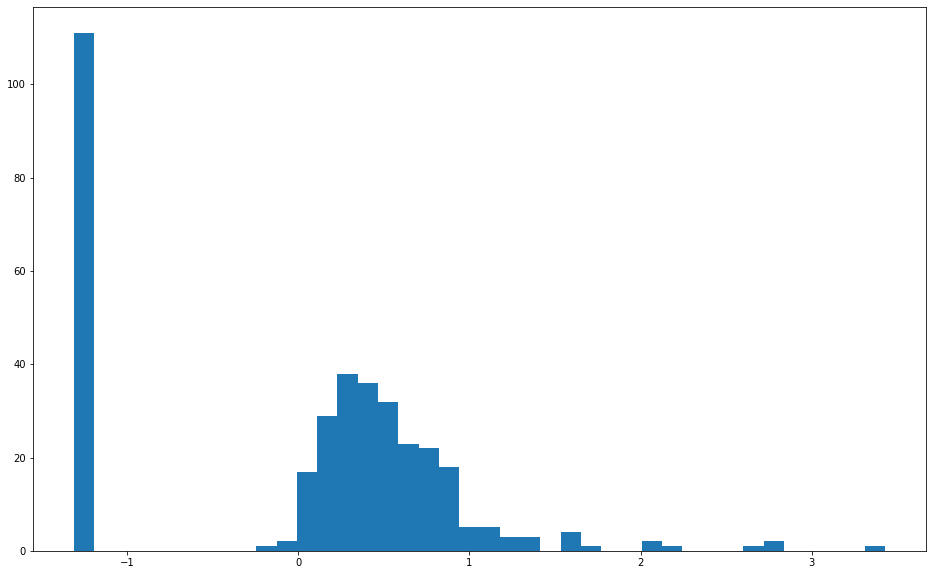

In [5]:
plt.figure(figsize=(16,10))
plt.hist(train.values, bins=40)
plt.show()

Столбец слева и сильнейшие колебания в отрицательные значения говорят о том, что что-то не так.

Если заглянуть в файл и календарь, то можно увидеть, что это одно и то же значение и оно стоит на выходном дне.

Поэтому удалим эти данные.

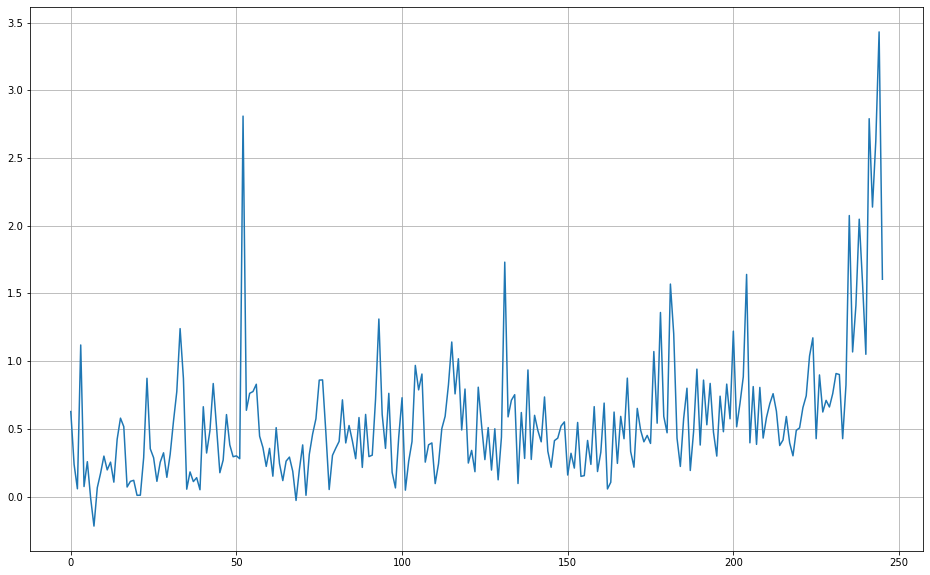

In [6]:
plt.figure(figsize=(16,10))
plt.plot(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.grid()
plt.show()

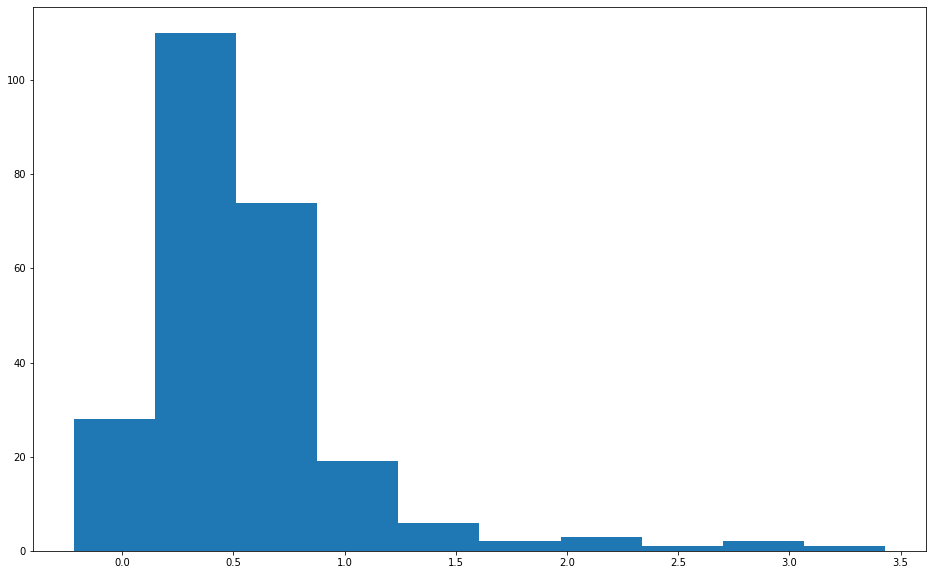

In [7]:
plt.figure(figsize=(16,10))
plt.hist(train['Target'].values[train['Target'] != train['Target'].values.min()])
plt.show()

Уже лучше. Переобозначим данные. Надо бы подумать, какое это распределение

In [8]:
data = data[data['Target'] != data['Target'].min()]
train = train[train['Target'] != train['Target'].min()]
test = test[test['Target'] != test['Target'].min()]

Посмотрим, как у нас со скользящим средним.

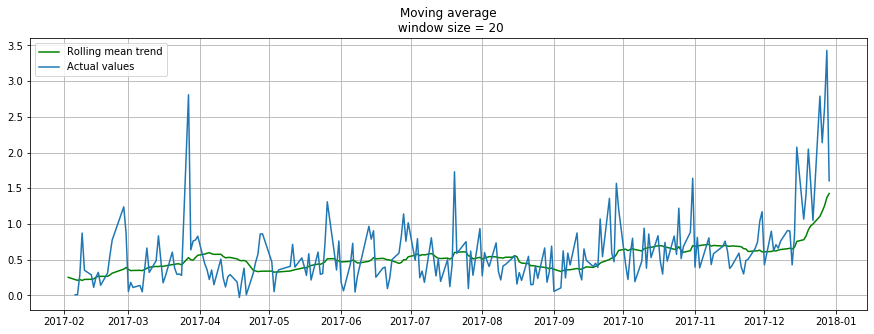

In [9]:
plotMovingAverage(train, train['Target'], 20)

В конце намечается какой-то тренд. Посмотрим на все данные.

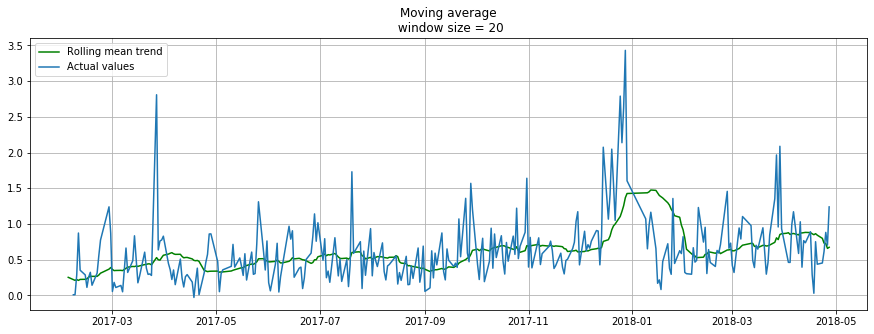

In [10]:
plotMovingAverage(data, data['Target'], 20)

Видим, что ликвидность нарастает к концу года, а в начале года она спадает и возвращается к прежней форме.

# Feature engineering

# Бизнес-логика

# Anomaly detection

Перепробуем все методы, чё нам

In [25]:
# Абсолютные значения (все)
alg = rpt.Dynp(jump=5).fit(data['Target'].values)
my_bkpg_dynp = alg.predict(n_bkps=5)
print('Dynamic programming ' + str(my_bkpg_dynp))

alg = rpt.Pelt(jump=5).fit(data['Target'].values)
my_bkpg_pelt = alg.predict(pen=10)
print('Pelt ' + str(my_bkpg_pelt))

alg = rpt.Binseg(jump=5).fit(data['Target'].values)
my_bkpg_binseg = alg.predict(n_bkps=5)
print('Binnary ' + str(my_bkpg_binseg))

alg = rpt.BottomUp(jump=5).fit(data['Target'].values)
my_bkpg_bot = alg.predict(n_bkps=5)
print('BottomUp ' + str(my_bkpg_bot))

alg = rpt.Window(jump=5).fit(data['Target'].values)
my_bkpg_win = alg.predict(n_bkps=5)
print('Window ' + str(my_bkpg_win))

my_bkpg_cumsum = change_point_detection(data['Target'].values.tolist())
print('Cumsum ' + str(my_bkpg_cumsum))

Dynamic programming [30, 175, 235, 240, 245, 322]
Pelt [235, 245, 322]
Binnary [175, 235, 240, 245, 250, 322]
BottomUp [50, 175, 235, 240, 245, 322]
Window [200, 322]
Cumsum [0, 322]


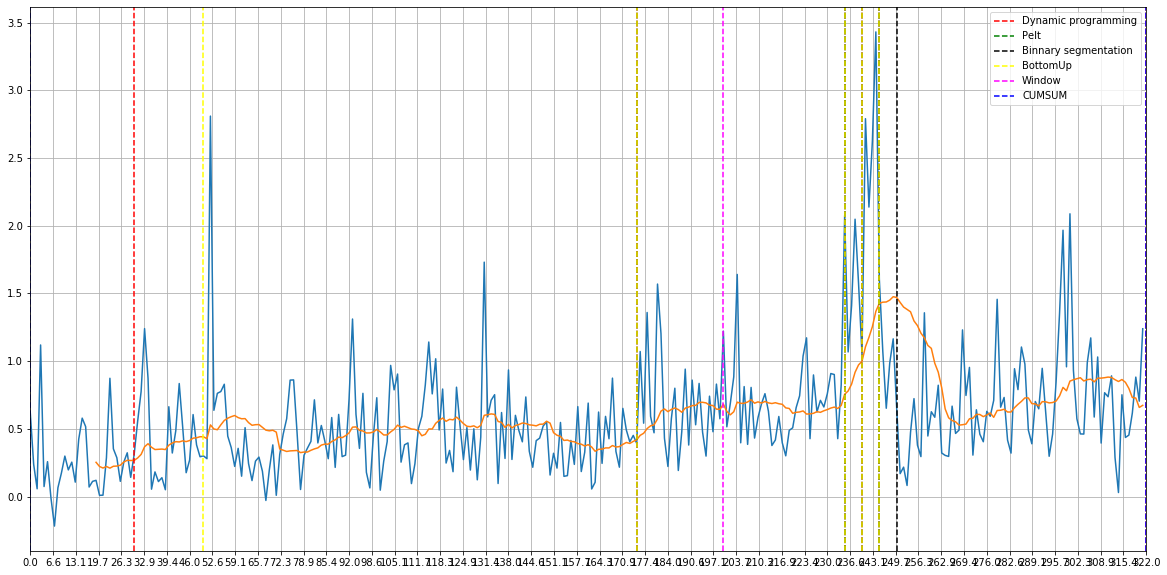

In [26]:
rolling_mean = data['Target'].rolling(window=20).mean().values
plt.figure(figsize=(20,10))
plt.plot(data['Target'].values)
plt.plot(rolling_mean)
plt.xticks(np.linspace(0,322))
plt.xlim((0,322))
for i, xc in enumerate(my_bkpg_dynp):
    if i != len(my_bkpg_dynp) - 1:
        plt.axvline(x=xc,color='red', linestyle='--')
    else:
        plt.axvline(x=xc,color='red', linestyle='--', label='Dynamic programming')
for i, xc in enumerate(my_bkpg_pelt):
    if i != len(my_bkpg_pelt) - 1:
        plt.axvline(x=xc, color='green', linestyle='--')
    else:
        plt.axvline(x=xc, color='green', linestyle='--', label='Pelt')
for i, xc in enumerate(my_bkpg_binseg):
    if i != len(my_bkpg_binseg) - 1:
        plt.axvline(x=xc, color='black', linestyle='--')
    else:
        plt.axvline(x=xc, color='black', linestyle='--', label='Binnary segmentation')
for i, xc in enumerate(my_bkpg_bot):
    if i != len(my_bkpg_bot) - 1:
        plt.axvline(x=xc, color='yellow', linestyle='--')
    else:
        plt.axvline(x=xc, color='yellow', linestyle='--', label='BottomUp')
for i, xc in enumerate(my_bkpg_win):
    if i != len(my_bkpg_win) - 1:
        plt.axvline(x=xc, color='magenta', linestyle='--')
    else:
        plt.axvline(x=xc, color='magenta', linestyle='--', label='Window')
for i, xc in enumerate(my_bkpg_cumsum):
    if i != len(my_bkpg_cumsum) - 1:
        plt.axvline(x=xc, color='blue', linestyle='--')
    else:
        plt.axvline(x=xc, color='blue', linestyle='--', label='CUMSUM')
plt.grid()
plt.legend()
plt.show()

In [27]:
dif = data.diff().values[1:]
# Приращения (все)
alg = rpt.Dynp(jump=5).fit(dif)
my_bkpg_dynp = alg.predict(n_bkps=5)
print('Dynamic programming ' + str(my_bkpg_dynp))

alg = rpt.Pelt(jump=5).fit(dif)
my_bkpg_pelt = alg.predict(pen=10)
print('Pelt ' + str(my_bkpg_pelt))

alg = rpt.Binseg(jump=5).fit(dif)
my_bkpg_binseg = alg.predict(n_bkps=5)
print('Binnary ' + str(my_bkpg_binseg))

alg = rpt.BottomUp(jump=5).fit(dif)
my_bkpg_bot = alg.predict(n_bkps=5)
print('BottomUp ' + str(my_bkpg_bot))

alg = rpt.Window(jump=5).fit(dif)
my_bkpg_win = alg.predict(n_bkps=5)
print('Window ' + str(my_bkpg_win))

my_bkpg_cumsum = change_point_detection(dif.tolist())
print('Cumsum ' + str(my_bkpg_cumsum))

Dynamic programming [230, 235, 295, 300, 305, 321]
Pelt [321]
Binnary [230, 235, 295, 300, 305, 321]
BottomUp [110, 230, 235, 295, 300, 321]
Window [115, 235, 321]
Cumsum [0, 321]


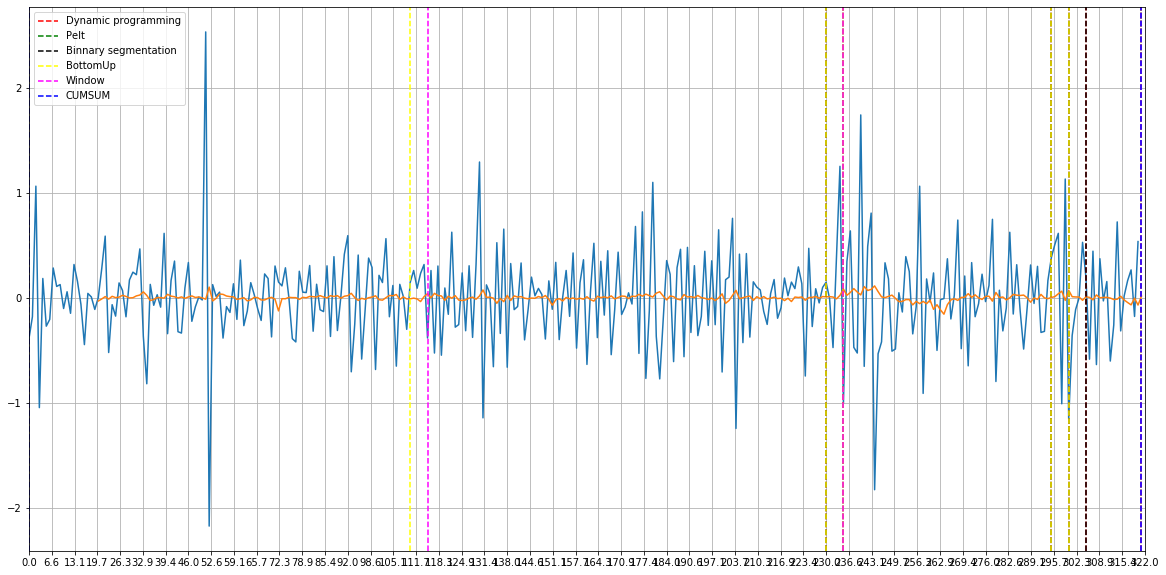

In [28]:
rolling_mean = data['Target'].diff().rolling(window=20).mean().values
plt.figure(figsize=(20,10))
plt.plot(dif)
plt.plot(rolling_mean)
plt.xticks(np.linspace(0,322))
plt.xlim((0,322))
for i, xc in enumerate(my_bkpg_dynp):
    if i != len(my_bkpg_dynp) - 1:
        plt.axvline(x=xc,color='red', linestyle='--')
    else:
        plt.axvline(x=xc,color='red', linestyle='--', label='Dynamic programming')
for i, xc in enumerate(my_bkpg_pelt):
    if i != len(my_bkpg_pelt) - 1:
        plt.axvline(x=xc, color='green', linestyle='--')
    else:
        plt.axvline(x=xc, color='green', linestyle='--', label='Pelt')
for i, xc in enumerate(my_bkpg_binseg):
    if i != len(my_bkpg_binseg) - 1:
        plt.axvline(x=xc, color='black', linestyle='--')
    else:
        plt.axvline(x=xc, color='black', linestyle='--', label='Binnary segmentation')
for i, xc in enumerate(my_bkpg_bot):
    if i != len(my_bkpg_bot) - 1:
        plt.axvline(x=xc, color='yellow', linestyle='--')
    else:
        plt.axvline(x=xc, color='yellow', linestyle='--', label='BottomUp')
for i, xc in enumerate(my_bkpg_win):
    if i != len(my_bkpg_win) - 1:
        plt.axvline(x=xc, color='magenta', linestyle='--')
    else:
        plt.axvline(x=xc, color='magenta', linestyle='--', label='Window')
for i, xc in enumerate(my_bkpg_cumsum):
    if i != len(my_bkpg_cumsum) - 1:
        plt.axvline(x=xc, color='blue', linestyle='--')
    else:
        plt.axvline(x=xc, color='blue', linestyle='--', label='CUMSUM')
plt.grid()
plt.legend()
plt.show()

# Feature selection